# Lagrange Multipliers

Before beginning this section, it is important to remind yourself that the gradient of a function is perpendicular to level sets.

For example, given the function $f(x) = x^2+y^2$, the level sets are circles centred at the origin.  The gradient is 

$$
\nabla f = 2x \vec{i} + 2 y \vec{j}
$$

which points in the same direction as $x \vec{i} + y \vec{j}$, so it points directly away from the origin.




## Maximising and minimising a function given a constraint.

Let us consider the following question:
- Find the maximum and minimum values of the function $f(x,y) = x^2+y^2$ and their locations subject to the constraint that $g(x,y) = 0$ where $g(x,y) = 5x^2/8 + 5y^2/8 - 3xy/4-1$.

That is, if we consider all points $(x,y)$ on the contour $g(x,y)=0$, which points have the largest and smallest values of $f$ and what are those values?

To help visualize this, we use a 2D plot with the points where $g(x,y)=0$ in red and contours of $f$ in dashed blue.  The contour having the largest value on the constraint and the contour with the minimum value are shown in solid magenta.

We also plot the corresponding curves of constant $f$ in a 3D plot in blue and the values of $f$ at the points where $g(x,y)=0$ in red.  In dash-dot red in the $xy$ plane, we plot the constraint $g(x,y)=0$.




error: parse error:

  syntax error

>>> [constraint_coords,c] = contour(X,Y,G, [0,0], 'r', 'DisplayName', 'g(x,y)=0);
                                                                                ^
error: legend: expecting label to be a string
error: called from
    __gnuplot_legend__ at line 472 column 11
    legend at line 201 column 7


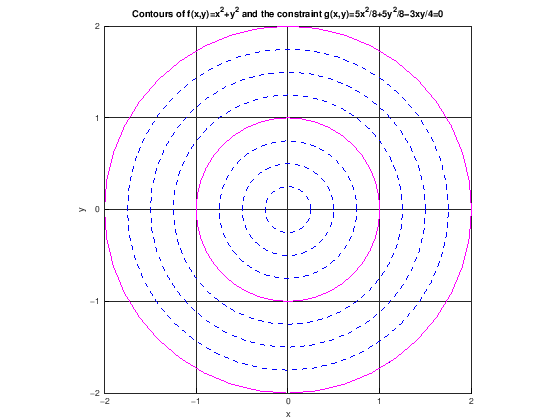

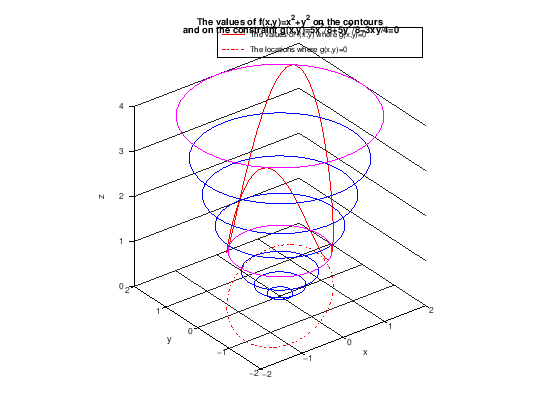

In [16]:
graphics_toolkit("gnuplot") # gnuplot is currently the only way I can get 
                            # matlab/octave to display using this format
                            # However, it is not ideal - there is no control over
                            # font sizes, line widths, or ability to interact
                            # with the plot.


% rho = [0:0.1:2];
theta = [0:pi/20:2*pi];
% [Rho,Theta] = meshgrid(rho, theta);
% X = Rho.*cos(Theta);
% Y = Rho.*sin(Theta);

x = [-2:0.1:2];
y = [-2:0.1:2];
[X,Y] = meshgrid(x,y);

G = 5*X.^2/8 + 5*Y.^2/8 -3*X.*Y/4 - 1;

%the following command plots the points given by the constraint g(x,y)=0
%and it creates a list of the x and y coordinates.
[constraint_coords,c] = contour(X,Y,G, [0,0], 'r', 'DisplayName', 'g(x,y)=0);
constraint_x = constraint_coords(1,2:end); %x coordinates of the constraint points
constraint_y = constraint_coords(2,2:end); %y coordinates of the constraint points
daspect([1,1])
xlabel('x')
ylabel('y')
hold on 
%contour(X,Y,F, [0.25,1,2.25,4])

figure(2)
plot3(constraint_x, constraint_y, constraint_x.^2+constraint_y.^2,'r', 'DisplayName', 'The values of f(x,y) where g(x,y)=0') #plot values on the constraint
hold on
plot3(constraint_x, constraint_y, zeros(size(constraint_x)),'r-.', 'DisplayName', 'The locations where g(x,y)=0') #plot the constraint points
daspect([1,1])
xlabel('x')
ylabel('y')
zlabel('z')


for radius = [0:0.25:2]; #radius of the contour
    figure(1)
    plot(radius*cos(theta), radius*sin(theta), '--', 'Color', 'b')
    figure(2)
    plot3((radius)*cos(theta), (radius).*sin(theta), radius^2*ones(size(theta)), 'Color', 'b')
    hold on
endfor

for radius = [1,2]
    figure(1)
    plot(radius*cos(theta), radius*sin(theta), 'Color', 'm')
    figure(2)
    plot3((radius)*cos(theta), (radius).*sin(theta), radius^2*ones(size(theta)), 'Color', 'm')
endfor

figure(1)
grid on
title('Contours of f(x,y)=x^2+y^2 and the constraint g(x,y)=5x^2/8+5y^2/8-3xy/4=0')
legend("location", 'northeast', 'FontSize', 10)

figure(2)
grid on
title('The values of f(x,y)=x^2+y^2 on the contours\n and on the constraint g(x,y)=5x^2/8+5y^2/8-3xy/4=0')
legend("location", 'northeast')


## Constraint and contours are tangent at minimum/maximum

If we look at the 2D plot, an interesting property emerges.  The contour of $f$ corresponding to the largest value on the constraint $f(x,y)=2^2=4$ (the farthest out from the origin) and the contour corresponding to the smallest value $f(x,y)=1^2=1$ are both tangent to the constraint curve at the points of intersection.

This is not coincidence.  It is most easily seen by looking at a contour of $f$ that intersects the constraint curve, and is not tangent to the constraint curve.  Typically, to one side of the contour are contours corresponding to larger values of $f$ while to the other side are contours corresponding to smaller values of $f$.  Since the constraint crosses the contour of $f$, this means that to one side it encounters larger values of $f$ and to the other side it encounters smaller values.




To illustrate this, we plot the constraint again with the contours $f(x,y)=1$ (the minimum) $f(x,y)=1.5^2$ (an intermediate value), and $f(x,y)=4$ (the maximum).  At the intersections of the contours and $g(x,y)=0$ we plot $\nabla g$ and $\nabla f$.  We will be particularly interested in the intersections of $f(x,y)=1.5^2$ and $g(x,y)=0$ to see how we can tell they are not local maxima or minima.


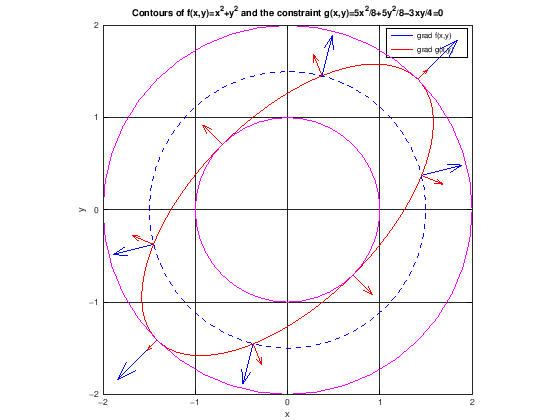

In [ ]:
graphics_toolkit("gnuplot") # gnuplot is currently the only way I can get 
                            # matlab/octave to display using this format
                            # However, it is not ideal - there is no control over
                            # font sizes, line widths, or ability to interact
                            # with the plot.


theta = [0:pi/20:2*pi];

x = [-2:0.1:2];
y = [-2:0.1:2];
[X,Y] = meshgrid(x,y);

G = 5*X.^2/8 + 5*Y.^2/8 -3*X.*Y/4 - 1;

%the following command plots the points given by the constraint g(x,y)=0
%and it creates a list of the x and y coordinates.
[constraint_coords,c] = contour(X,Y,G, [0,0], 'r');
constraint_x = constraint_coords(1,2:end); %x coordinates of the constraint points
constraint_y = constraint_coords(2,2:end); %y coordinates of the constraint points
daspect([1,1])
xlabel('x')
ylabel('y')
hold on 
%contour(X,Y,F, [0.25,1,2.25,4])

for radius = [1.5]; #radius of the contour
    figure(1)
    plot(radius*cos(theta), radius*sin(theta), '--', 'Color', 'b')
endfor

for radius = [1,2]
    figure(1)
    plot(radius*cos(theta), radius*sin(theta), 'Color', 'm')
endfor

figure(1)
grid on
title('Contours of f(x,y)=x^2+y^2 and the constraint g(x,y)=5x^2/8+5y^2/8-3xy/4=0\n 
showing the gradients of f and g at the intersection points') 
%legend("location", 'northeast', 'FontSize', 10)

%the constraint can be written xi=2cos(phi), eta = sin(phi)
%with x = cos(alpha) xi - sin(alpha) eta
%and y = sin(alpha) xi + cos(alpha) eta
%where alpha is the angle of the ellipse, in this case pi/4
%after algebra, we learn cos^2(phi) = 5/12.
%taking phi = acos(sqrt(5/12)), 
alpha = pi/4;
phi = acos(sqrt(5/12));
xi = 2*cos(phi);
eta = sin(phi);
intersection_x = cos(alpha)*xi - sin(alpha)*eta;
intersection_y = sin(alpha)*xi + cos(alpha)*eta;

gradf = [2*intersection_x, 2*intersection_y]; %gradient of f at the intersection point
gradg = [5*intersection_x/4 - 3*intersection_y/4, 5*intersection_y/4 - 3*intersection_x/4]; %gradient of g at the intersection point
quiver(intersection_x, intersection_y, gradf(1), gradf(2), 0.15, 'Color', 'b', 'DisplayName', 'grad f(x,y)')
quiver(intersection_x, intersection_y, gradg(1), gradg(2), 0.15, 'Color', 'r', 'DisplayName', 'grad g(x,y)')

%now we add the arrows at the other intersection points, but without labels.
for phi = [-acos(sqrt(5/12)), acos(-sqrt(5/12)), -acos(-sqrt(5/12)), 0, pi/2, pi, 3*pi/2]
    xi = 2*cos(phi);
    eta = sin(phi);
    intersection_x = cos(alpha)*xi - sin(alpha)*eta;
    intersection_y = sin(alpha)*xi + cos(alpha)*eta;

    gradf = [2*intersection_x, 2*intersection_y]; %gradient of f at the intersection point
    gradg = [5*intersection_x/4 - 3*intersection_y/4, 5*intersection_y/4 - 3*intersection_x/4]; %gradient of g at the intersection point
    quiver(intersection_x, intersection_y, gradf(1), gradf(2), 0.15, 'Color', 'b')
    quiver(intersection_x, intersection_y, gradg(1), gradg(2), 0.15, 'Color', 'r')
endfor


legend("location", 'northeast')


(note, in the plot above, the gradients at the minima are exactly equal, so only one appears)

If we change $(x,y)$ slightly from the top point of intersection of $g(x,y)=0$ with $f(x,y)=(3/2)^2$ by moving in the clockwise direction, we increase $f$.  If we move in the counter-clockwise direction, we decrease $f$.  Inevitably, if $g(x,y)=0$ crosses the contour of $f$ at $(x_0,y_0)$, it will encounter contours on either side of the contour of $f$ through $(x_0,y_0)$.  So to avoid crossing the contour we require that the contour and $g(x,y)=0$ be tangent.

If the constraint and the contour are tangent to each other, there gradients must be parallel. This means that $\nabla f = \lambda \nabla g$ for some scalar $\lambda$ (which will typically depend on the point in space).




## Method of Lagrange Multipliers in 2D:

To use Lagrange Multipliers to find local minima and maxima of $f(x,y)$ subject to the constraint $g(x,y)=0$, we follow these steps:
- Calculate $\nabla f$ and $\nabla g$
- Set $\nabla f= \lambda \nabla g$ where $\lambda$ is a scalar.
- Each component of $\nabla f = \lambda \nabla g$ gives an equation.  Add $g(x,y)=0$, to these equations to get three equations for the three unknowns at each point: $x, y, \lambda$.
- Solve the three equations for the three unknowns (there is no set recipe for doing this calculation, and for some cases it can only be solved using numerical approximation methods).
- Calculate $f$ at the points.

This procedure will find all local minima and maxima of $f$ subject to the constraint.  If the curve $g(x,y)=0$ is a closed curve (like an ellipse or a circle), then the global maxima and minima must be among these local minima and maxima.



## Generalizations to higher dimension
In higher dimensions, given the constraint $g(x_1, x_2, \ldots, x_n) = 0$ we find the local maxima and minima of $f(x_1, x_2, \ldots, x_n)$ by the same approach.  We set

$$
\nabla f = \lambda \nabla g
$$
which yields $n$ equations (one equation for each $\partial/\partial x_i$).  We have $n+1$ variables ($x_1$, $x_2$, \ldots, $x_n$ and $\lambda$), so we also use the equation $g(x_1,x_2, \ldots, x_n)=0$. 

We then solve these $n+1$ equations, which yields $(x_1, x_2, \ldots, x_n)$.  We check the value of $f$ at each of these.

## Caveats
Note: 
- if the curve $g(x,y)=0$ goes off to infinity, then it may be the case that the global minimum or global maximum is only in the limit at infinity.
- if the curve $g(x,y)=0$ ends abruptly (say we had the constraint above with the additional condition $|x|\leq 1$), then the global maximum or minimum may occur at the end points.



## Further application
In the argument above, we implicitly assumed that given a contour of $f$, the values of $f$ on one side of the contour are larger and on the other side they are smaller.  

It could be that the contours on both sides are smaller or on both sides are larger.  For example, we might have 

$$
f(x,y) = \sqrt{x^2+y^2} - (x^2+y^2)
$$
This increases as the distance from the origin increases until that distance is $\sqrt{x^2+y^2}=1/2$, at which point it begins to decrease again.  This is easier to see in polar coordinates.  If we set $r = \sqrt{x^2+y^2}$ then  $f(x,y) = r-r^2$, which has its maximum at $r=1/2$

Luckily in this case the method still works.  We can show that where $\sqrt{x^2+y^2} = 1/2$ the gradient of $f$ is $\vec{0}$:

\begin{align*}
\nabla f(x,y) &= \frac{\partial \sqrt{x^2+y^2} - (x^2+y^2)}{\partial x} \vec{i} + \frac{ \partial \sqrt{x^2+y^2} - (x^2+y^2)}{ \partial y} \vec{j}\\
&= \left(\frac{1}{2}\frac{2x}{\sqrt{x^2+y^2}} - 2x \right) \vec{i} + \left(\frac{1}{2}\frac{2y}{\sqrt{x^2+y^2}} - 2y \right) \vec{j}\\
\end{align*}

As $\sqrt{x^2+y^2} = 1/2$, this becomes 

\begin{align*}
\nabla f(x,y) &= \left(\frac{x}{1/2} - 2x \right)\vec{i} + \left(\frac{y}{1/2} - 2y \right) \vec{j}\\
&= \vec{0}
\end{align*}

And so we would still find such a point by setting $\nabla f = \lambda \nabla g$, where in this case we would find $\lambda = 0$.






### Self-test

1. 
2. 
3. 
4. what if constraint crosses $f$ at a local maximum/minimum/other critical point?  Answer: At this point, even if it crosses the contour, the gradient of $f$ is $\vec{0}$.

In [3]:
acos(5/12)
pi/4

ans = 1.1410
ans = 0.7854
